<a href="https://colab.research.google.com/github/anushkaagrawal27/Fundas-of-eye-classification/blob/main/Eye_fundus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install -U -q segmentation-models
!pip install -q tensorflow==2.2.1
!pip install -q keras==2.5
import os
os.environ["SM_FRAMEWORK"]="tf.keras"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 KB 6.5 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement tensorflow==2.2.1 (from versions: 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.5, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.7.2, 2.7.3, 2.7.4, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0)
ERROR: No matching distribution found for tensorflow==2.2.1
ERROR: Could not find a version that satisfies the requirement keras==2.5 (from versions: 0.2.0, 0.3.0, 0.3.1, 0.3.2, 0.3.3, 1.0.0, 1.0.1, 1.0.2, 1.0.3, 1.0.4, 1.0.5, 1.0.6, 1.0.7, 1.0.8, 1.1.0, 1.1.1, 1.1.2, 1.2.0, 1.2.1, 1.2.2, 2.0.0, 2.0.1, 2.0.2, 2.0.3, 2.0.4, 2.0.5, 2.0.6, 2.0.7, 2.0.8, 2.0.9, 2.1.0, 2.1.1, 2.1.2, 2.1.3, 2.1.4, 2.1.5, 2.1.6, 2.2.0, 

In [ ]:
import pandas as pd
import segmentation_models as sm
# Segmentation Models: using `keras` framework.

Segmentation Models: using `tf.keras` framework.


In [ ]:
import keras
# or from tensorflow import keras

keras.backend.set_image_data_format('channels_last')
# or keras.backend.set_image_data_format('channels_first')

In [ ]:

data=pd.read_csv('https://drive.google.com/drive/folders/12y6kVVUWyGvK77YyqYpWz0NHy4B3YCNK?usp=share_link',on_bad_lines='skip')

In [ ]:
model = sm.Unet()

58889256/58889256 [==============================] - 1s 0us/step


In [ ]:

model = sm.Unet('resnet34', encoder_weights='imagenet',classes = 2)
# binary segmentation (this parameters are default when you call Unet('resnet34')


85521592/85521592 [==============================] - 1s 0us/step


In [ ]:
import glob
import cv2
from matplotlib import pyplot as plt
import numpy as np
import cv2
import tensorflow as tf
BACKBONE='resnet34'
preprocess_input=sm.get_preprocessing(BACKBONE)
SIZE_X =256
SIZE_Y=256
#capture training image info as a list
train_images=[]


class1 = [255]
class0 = [0]

lable_values = class1 + class0

def oneHot(mask):
  semanticmap = []
  for color in lable_values:
    equality = np.equal(mask,color)
    semanticmap.append(equality)

  semanticmap = (np.stack(semanticmap, axis = -1)).astype(float)
  return semanticmap


for directory_path in glob.glob("/content/drive/MyDrive/IE_club_dataset/membrane/membrane/train"):
  for img_path in glob.glob(os.path.join(directory_path,"*.png")):
   img = cv2.imread(img_path, cv2.IMREAD_COLOR)#printing image path 
   train_images.append(img)

train_images = np.array(train_images)

In [ ]:
train_masks = []
for directory_path in glob.glob("/content/drive/MyDrive/IE_club_dataset/membrane/membrane/mask"):
    
    for mask_path in glob.glob(os.path.join(directory_path, "*.png")):
        mask = cv2.imread(mask_path, 0)       
        #mask = cv2.resize(mask, (SIZE_Y, SIZE_X))
        # mask = cv2.cvtColor(mask, cv2.COLOR_RGB2BGR)

        mask = oneHot(mask)

        print(mask)
        train_masks.append(mask)
        
        #train_labels.append(label)
#Convert list to array for machine learning processing          
train_masks = np.array(train_masks)

[[[0. 1.]
  [0. 1.]
  [0. 1.]
  ...
  [0. 1.]
  [0. 1.]
  [0. 1.]]

 [[0. 1.]
  [0. 1.]
  [0. 1.]
  ...
  [0. 1.]
  [0. 1.]
  [0. 1.]]

 [[0. 1.]
  [0. 1.]
  [0. 1.]
  ...
  [0. 1.]
  [0. 1.]
  [0. 1.]]

 ...

 [[0. 1.]
  [0. 1.]
  [0. 1.]
  ...
  [0. 1.]
  [0. 1.]
  [0. 1.]]

 [[0. 1.]
  [0. 1.]
  [0. 1.]
  ...
  [0. 1.]
  [0. 1.]
  [0. 1.]]

 [[0. 1.]
  [0. 1.]
  [0. 1.]
  ...
  [0. 1.]
  [0. 1.]
  [0. 1.]]]
[[[0. 1.]
  [0. 1.]
  [0. 1.]
  ...
  [0. 1.]
  [0. 1.]
  [0. 1.]]

 [[0. 1.]
  [0. 1.]
  [0. 1.]
  ...
  [0. 1.]
  [0. 1.]
  [0. 1.]]

 [[0. 1.]
  [0. 1.]
  [0. 1.]
  ...
  [0. 1.]
  [0. 1.]
  [0. 1.]]

 ...

 [[0. 1.]
  [0. 1.]
  [0. 1.]
  ...
  [0. 1.]
  [0. 1.]
  [0. 1.]]

 [[0. 1.]
  [0. 1.]
  [0. 1.]
  ...
  [0. 1.]
  [0. 1.]
  [0. 1.]]

 [[0. 1.]
  [0. 1.]
  [0. 1.]
  ...
  [0. 1.]
  [0. 1.]
  [0. 1.]]]
[[[0. 1.]
  [0. 1.]
  [0. 1.]
  ...
  [0. 1.]
  [0. 1.]
  [0. 1.]]

 [[0. 1.]
  [0. 1.]
  [0. 1.]
  ...
  [0. 1.]
  [0. 1.]
  [0. 1.]]

 [[0. 1.]
  [0. 1.]
  [0. 1.]
  ...


In [ ]:
#Use customary x_train and y_train variables

X = train_images.astype(np.float32)
Y = train_masks.astype(np.float32)
#Y = np.expand_dims(Y , axis=2 ) #May not be necessary.. leftover from previous code 


from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

# preprocess input
x_train = preprocess_input(x_train)
x_val = preprocess_input(x_val)

# define model
model = sm.Unet(BACKBONE, encoder_weights='imagenet')
model.compile(optimizer='adam', loss = sm.losses.JaccardLoss(class_weights = [1,0.0048],class_indexes = None,per_image= False,smooth = 1e-05), metrics=['mse'])

print(model.summary())

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 data (InputLayer)              [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 bn_data (BatchNormalization)   (None, None, None,   9           ['data[0][0]']                   
                                3)                                                                
                                                                                                  
 zero_padding2d_34 (ZeroPadding  (None, None, None,   0          ['bn_data[0][0]']                
 2D)                            3)                                                          

In [ ]:


history=model.fit(x_train, 
          y_train,
          batch_size=8, 
          epochs=100,
          verbose=1,
          validation_data=(x_val, y_val))




Epoch 1/100
2/2 [==============================] - 55s 7s/step - loss: 0.9829 - mse: 0.2684 - val_loss: 0.9839 - val_mse: 0.2875
Epoch 2/100
2/2 [==============================] - 1s 647ms/step - loss: 0.9776 - mse: 0.3009 - val_loss: 0.9829 - val_mse: 0.3639
Epoch 3/100
2/2 [==============================] - 1s 591ms/step - loss: 0.9735 - mse: 0.3372 - val_loss: 0.9828 - val_mse: 0.4925
Epoch 4/100
2/2 [==============================] - 1s 657ms/step - loss: 0.9705 - mse: 0.3626 - val_loss: 0.9832 - val_mse: 0.5658
Epoch 5/100
2/2 [==============================] - 1s 657ms/step - loss: 0.9691 - mse: 0.3739 - val_loss: 0.9833 - val_mse: 0.5794
Epoch 6/100
2/2 [==============================] - 1s 652ms/step - loss: 0.9673 - mse: 0.3778 - val_loss: 0.9833 - val_mse: 0.5761
Epoch 7/100
2/2 [==============================] - 1s 607ms/step - loss: 0.9663 - mse: 0.3849 - val_loss: 0.9833 - val_mse: 0.5556
Epoch 8/100
2/2 [==============================] - 1s 679ms/step - loss: 0.9649 - mse

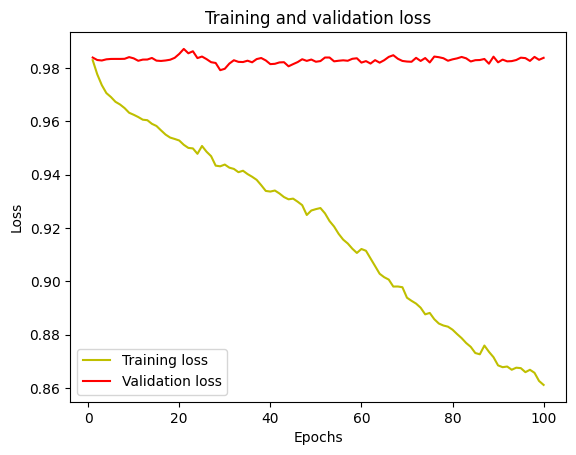

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model = tf.keras.models.load_model("/content/drive/MyDrive/IE_club_dataset/core.h5",
                                   custom_objects={'jaccard_loss':sm.losses.JaccardLoss(),'f1-score': sm.metrics.FScore()})


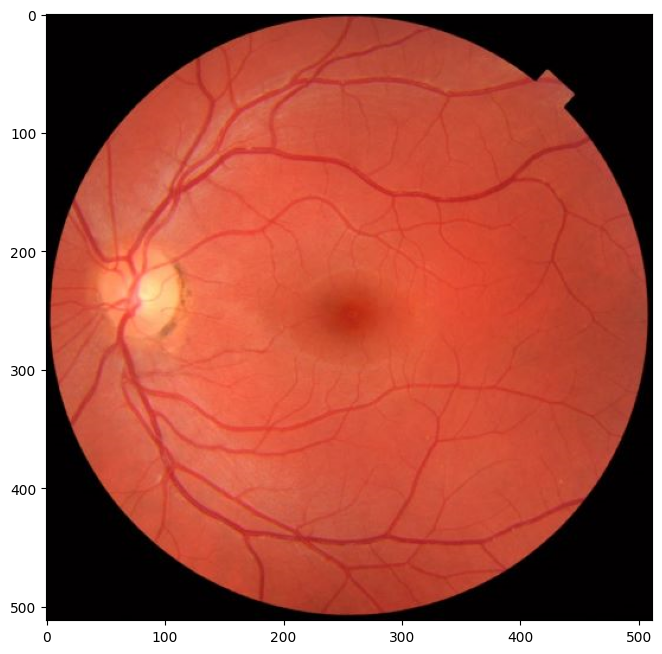

1/1 [==============================] - 1s 835ms/step


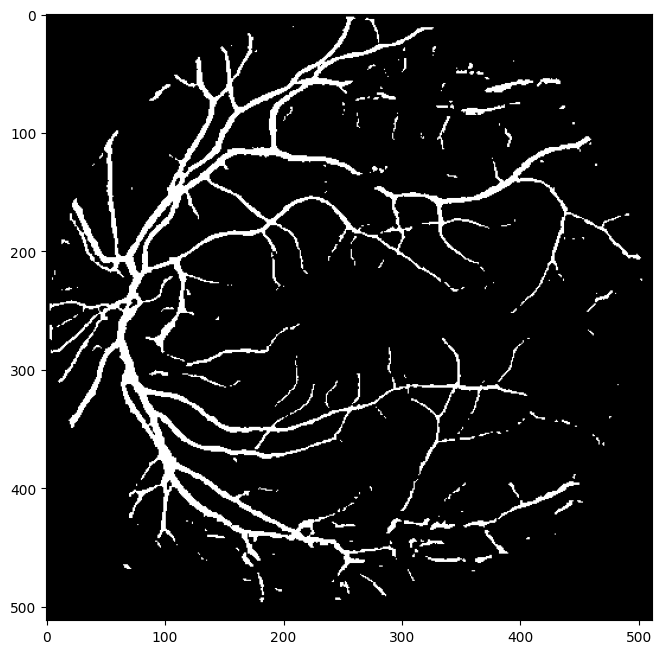

In [ ]:
from tensorflow import keras
import cv2
from matplotlib import pyplot as plt
# from segmentation_Model import *
import numpy as np

# test_img = cv2.imread(
#     "/content/drive/MyDrive/internship_retinopathy/FUNDUS_OF_EYE/data_keras3/val/images/21_training.png", cv2.IMREAD_COLOR)
test_img = cv2.imread(
    "/content/drive/MyDrive/IE_club_dataset/demo1.png", cv2.IMREAD_COLOR)
# test_img = cv2.imread(
#     "/content/drive/MyDrive/internship_retinopathy/FUNDUS_OF_EYE/data_keras3/train/images/1_training.png", cv2.IMREAD_COLOR)
# test_img = cv2.imread(
#     "/content/drive/MyDrive/internship_retinopathy/FUNDUS_OF_EYE/data_keras3/val/images/demo2.png", cv2.IMREAD_COLOR)

test_img = cv2.resize(test_img, (512, 512))
test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
def cm_to_inch(value):
    return value/2.54
plt.figure(figsize=(cm_to_inch(20),cm_to_inch(20)))
plt.imshow(test_img, cmap='gray')
plt.show()
test_img = np.expand_dims(test_img, axis=0)

prediction = model.predict(test_img)
prediction_image = prediction.reshape([512,512,2])
# print(prediction_image[0:20])
# plt.imshow(np.argmax(prediction_image,axis=-1), cmap='gray')


def colour_code(image, lable_values):
    x = np.argmax(image, axis = -1)
    colour_codes = np.array(lable_values)
    x = colour_codes[x.astype(int)]
    return x

x= colour_code(prediction_image,lable_values)


plt.figure(figsize=(cm_to_inch(20),cm_to_inch(20)))
plt.imshow(x,cmap = 'gray')
plt.show()

In [ ]:
#
 